# CSE 2794 – Machine Learning Workshop 2
# LAB ASSIGNMENT-2: MULTI LAYER PERCEPTRON LEARNING

## Name: Shahid Abdul Farhad
## Reg. No.: 2341006002
## Section: 23412C3

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=";")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1077,8.6,0.370,0.65,6.4,0.080,3.0,8.0,0.99817,3.27,0.58,11.0,5
125,9.0,0.620,0.04,1.9,0.146,27.0,90.0,0.99840,3.16,0.70,9.4,5
1323,9.1,0.360,0.39,1.8,0.060,21.0,55.0,0.99495,3.18,0.82,11.0,7
638,7.7,0.915,0.12,2.2,0.143,7.0,23.0,0.99640,3.35,0.65,10.2,7
1045,6.9,0.440,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,6


In [4]:
df.value_counts(df['quality'])

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

## Performing EDA

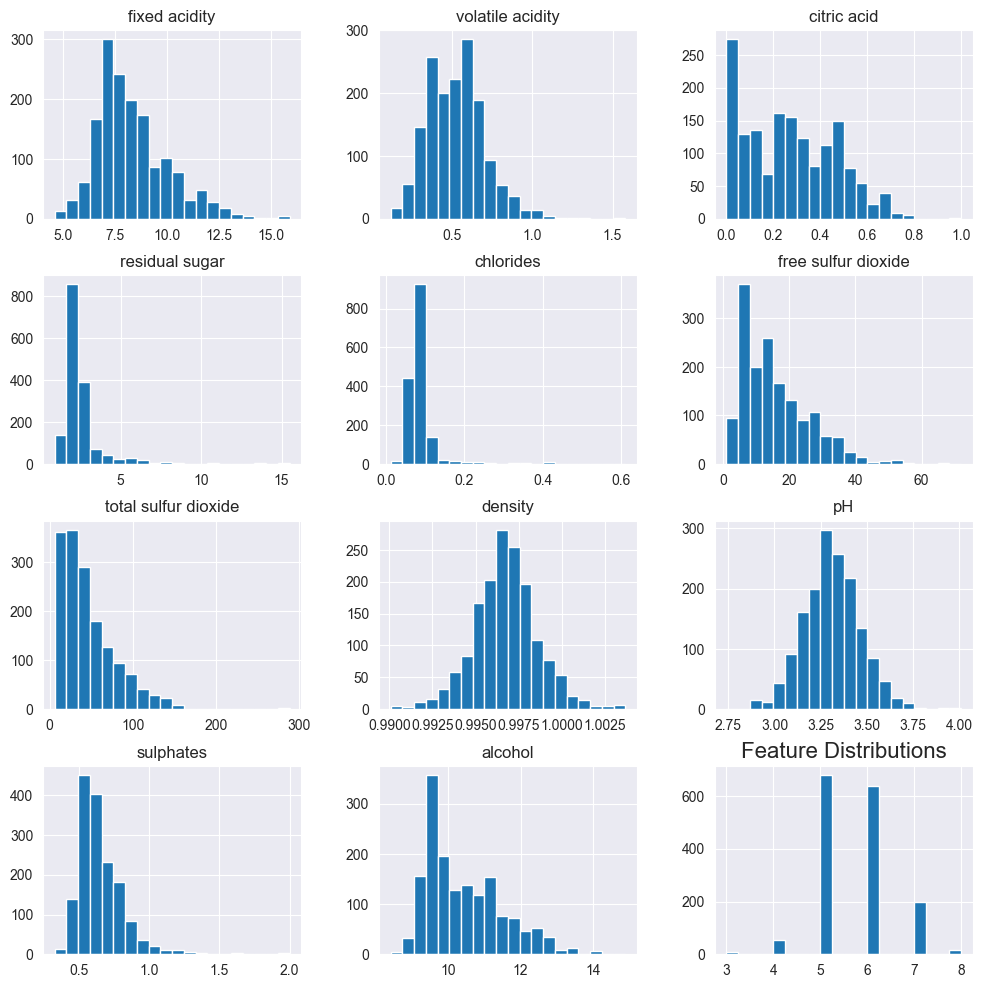

In [5]:
# Plot feature distributions
df.hist(figsize=(12, 12), bins=20)
plt.title("Feature Distributions", fontsize=16)
plt.show()

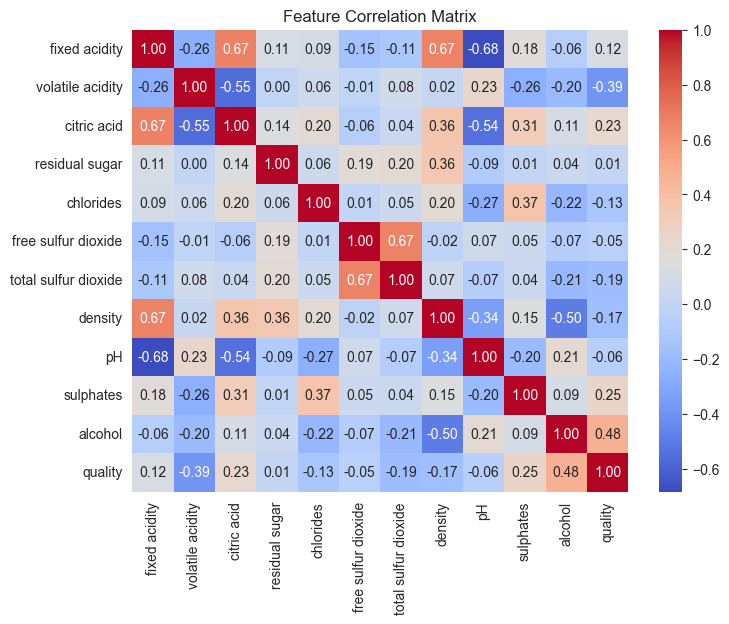

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


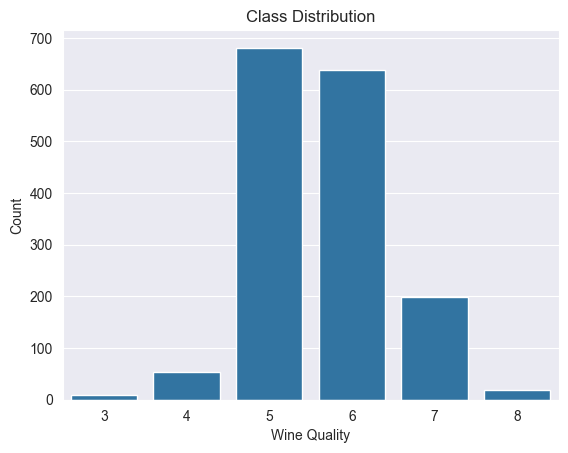

In [7]:
sns.countplot(x=df['quality'])
plt.title("Class Distribution")
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.show()


## Train Test Splitting

In [8]:
X=df.drop('quality',axis=1)
y=df['quality']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=df['quality'])

In [10]:
y_train

1542    6
1558    5
344     6
924     5
971     6
       ..
1056    7
1394    5
337     5
539     5
1083    6
Name: quality, Length: 1279, dtype: int64

# Using Standard Scaler and Label Encoder

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled

array([[-0.94797009,  1.84038456, -1.30310213, ..., -0.05665069,
        -0.58149257,  0.30561112],
       [-0.8299525 ,  0.57378326,  0.28806218, ..., -0.58456494,
        -0.58149257, -0.86781667],
       [ 2.12048734,  0.23602292,  1.16063616, ..., -1.24445776,
         0.65244695,  0.258674  ],
       ...,
       [-0.29887333, -0.55208456,  0.2367343 , ...,  0.00933859,
        -0.13278729, -0.11682289],
       [ 1.70742577, -0.15803082,  2.3925053 , ..., -0.58456494,
        -0.24496361,  0.72804512],
       [ 0.23220584, -0.60837795,  0.90399675, ...,  0.14131716,
         0.59635879,  1.4790389 ]])

In [13]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training labels and transform them
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test) # Transform y_test using the same encoder

In [14]:
y_train

1542    6
1558    5
344     6
924     5
971     6
       ..
1056    7
1394    5
337     5
539     5
1083    6
Name: quality, Length: 1279, dtype: int64

In [15]:
y_train_encoded

array([3, 2, 3, ..., 2, 2, 3])

# Build and Train an MLP Classifier using TensorFlow

In [16]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

In [17]:
model=Sequential()
model.add(Dense(64,activation='relu',input_dim=11))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dense(8,activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(6,activation='softmax'))

C:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 6)              │            54 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,566 (13.93 KB)

 Trainable params: 3,566 (13.93 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=1,verbose=1)

In [21]:
history = model.fit(X_train_scaled, y_train_encoded, validation_data=(X_test_scaled, y_test_encoded),epochs=100,batch_size=32,callbacks=[early_stop])

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0674 - loss: 1.8237 - val_accuracy: 0.1312 - val_loss: 1.7130
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1792 - loss: 1.6993 - val_accuracy: 0.3812 - val_loss: 1.5975
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3610 - loss: 1.5829 - val_accuracy: 0.4125 - val_loss: 1.4627
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4082 - loss: 1.4641 - val_accuracy: 0.4437 - val_loss: 1.3652
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4438 - loss: 1.3898 - val_accuracy: 0.4469 - val_loss: 1.2797
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4797 - loss: 1.3044 - val_accuracy: 0.4625 - val_loss: 1.2116
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4934 - loss: 1.2380 - val_accuracy: 0.5594 - val_loss: 1.1447
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5295 - loss: 1.2274 - val_accuracy: 0.5938 - v

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,confusion_matrix
y_pred_encoded = model.predict(X_test_scaled)
y_pred = label_encoder.inverse_transform(np.argmax(y_pred_encoded, axis=1)) # Decode predictions

# Compute accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use weighted average for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.61875
Precision: 0.6095080199801439
Recall: 0.61875
F1-score: 0.6029563070857714


C:\Users\farha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


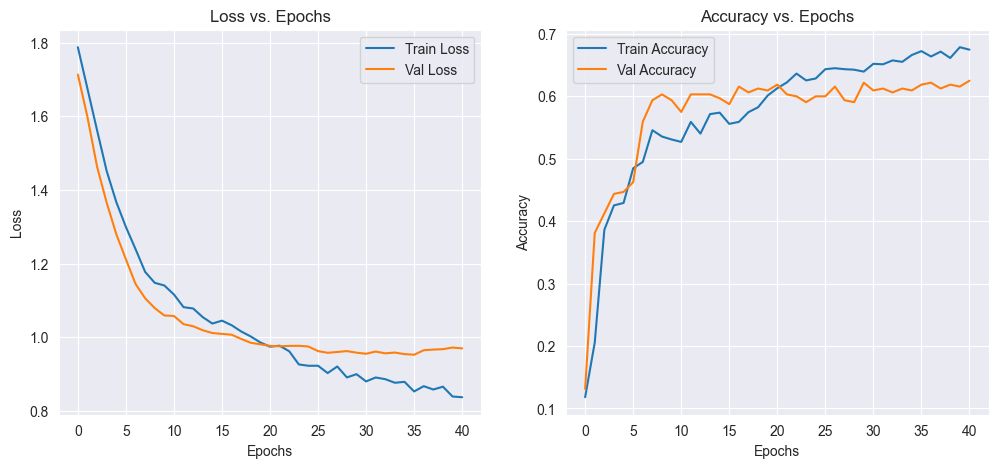

In [23]:
plt.figure(figsize=(12, 5))

# Plot training & validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

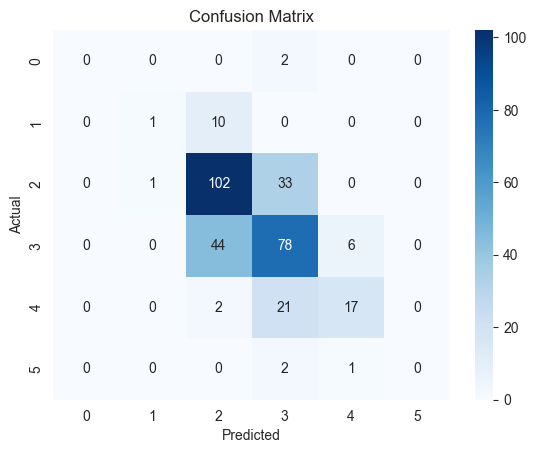

In [24]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
